<a href="https://colab.research.google.com/github/lucascavalcante87/personal_studies/blob/main/neural_networkt_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Functions
def heaviside_function(x:float):
    if x>=0:
        return 1
    else:
        return 0

def sigmoid_function(x:float):
    return 1/(1+np.exp(-x))

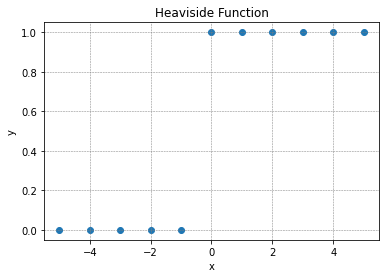

In [ ]:
# Heaviside Function
plt.scatter(x=np.linspace(-5,5,num=11),y=list(map(heaviside_function, np.linspace(-5,5,num=11))))
plt.title("Heaviside Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle="--", linewidth=0.5, color="gray")

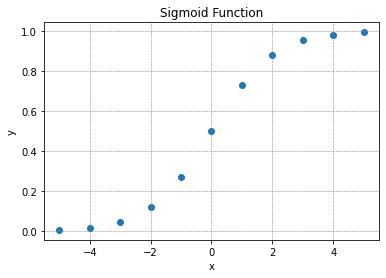

In [ ]:
# Sigmoid Function
plt.scatter(x=np.linspace(-5,5,num=11),y=list(map(sigmoid_function, np.linspace(-5,5,num=11))))
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle="--", linewidth=0.5, color="gray")

In [ ]:
# DataFrame
temperature = [21,20,18,29,23,23]
humidity = [91,70,70,85,80,70]
label = ["rainy","sunny","rainy","sunny","rainy","sunny"]

df = pd.DataFrame({"temperature": temperature
                  ,"humidity": humidity
                  ,"label": label
                  }
                 )

In [ ]:
# Show
df

,temperature,humidity,label
0,21,91,rainy
1,20,70,sunny
2,18,70,rainy
3,29,85,sunny
4,23,80,rainy
5,23,70,sunny


In [ ]:
# Binary Label
df["label"] = df["label"].replace(["rainy", "sunny"],[1,0])

In [ ]:
# Show
df

,temperature,humidity,label
0,21,91,1
1,20,70,0
2,18,70,1
3,29,85,0
4,23,80,1
5,23,70,0


In [ ]:
# Heaviside Function
def heaviside_function(x:float):
    if x>=0:
        return 1
    else:
        return 0

In [ ]:
# DataFrame to Numpy
matrix = df.to_numpy() # dataframe to matrix
X = matrix[:,:-1] # variables
y = matrix[:,-1:] # label
Xb = np.append(np.ones((y.size,1)), X, axis=1) # variables with bias column
W_0 = np.zeros((1,Xb.shape[1])) # first-step bias

In [ ]:
# ANN PreCalculus
weight_list = []
error_list = []
y_list = []
v_list = []
W_tmp = W_0
eta = 0.01
for row in range(y.shape[0]):
    local_field_tmp = Xb[row:row+1,:]
    v_tmp = np.dot(local_field_tmp,W_0.T)
    y_tmp = heaviside_function(v_tmp)
    error_tmp = y[row:row+1] - y_tmp
    W_tmp = W_tmp + eta * error_tmp * local_field_tmp
    weight_list.append(W_tmp)
    error_list.append(error_tmp)
    y_list.append(y_tmp)
    v_list.append(v_tmp)

In [ ]:
def ann_predict(temperature:float, humidity:float):
    v_tmp = np.dot(np.array([1, temperature, humidity]),weight_list[-1].T)
    predict_value = heaviside_function(v_tmp)
    if predict_value == 1:
        print("rainy")
    elif predict_value == 0:
        print("sunny")
    else:
        print("error")

In [ ]:
ann_predict(21, 79)

sunny
